# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import DictVectorizer
from collections import Counter, OrderedDict

#Changing default parameters of graph title and axes
params = {'axes.titlesize':'35',
          'axes.labelsize':'30',
          'xtick.labelsize':'30',
          'ytick.labelsize':'30',
          'legend.fontsize': '30',
          'legend.handlelength': '2'}
matplotlib.rcParams.update(params)

# Load Data

In [2]:
df_tweets = pd.read_csv('C:/Users/melin/Documents/Springboard Data Science Career Track/Capstone Projects/Capstone Project 2/df_tweets.csv')
df_tweets.shape

(813378, 14)

# Reduce Dataset Size

In [3]:
#Randomly drop additional 97% of rows  
df_tweets = df_tweets.sample(frac=.03)
df_tweets.shape

(24401, 14)

# Apply K-Means Clustering

In [4]:
#Remove rows containing missing values under the cleaned_text column 
df_tweets = df_tweets[df_tweets['cleaned_text'].notnull()]

# for reproducibility
random_state = 0 

#Compute TF-IDF values to create the feature and X matrices out of the cleaned_text column from the df_tweets dataset
vec = TfidfVectorizer()
vec.fit(df_tweets.cleaned_text.values)
features = vec.transform(df_tweets.cleaned_text.values)
X = vec.fit_transform(df_tweets.cleaned_text)

In [5]:
#Apply the k-means clustering algorithm in vectorized text of cleaned_text column of df_tweets dataset
true_k = 2 #2 is chosen as the number of clusters since there are 2 sentiment classes analyzed for this project
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#Get the centroids and features
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()

In [7]:
#Print the centroids into which clusters they belong
for i in range(true_k):
 print('Cluster %d:' % i),
 for ind in order_centroids[i, :10]:
     print(' %s' % terms[ind])

Cluster 0:
 covid
 coronaviru
 case
 ha
 amp
 death
 new
 peopl
 pandem
 test
Cluster 1:
 thi
 face
 covid
 coronaviru
 hand
 peopl
 time
 ha
 amp
 pandem


# Create K-Means Plot

In [8]:
#Create an instance of KMeans for the plot (2 is chosen as the number of clusters since there are 2 sentiment classes analyzed for this project)
cls = MiniBatchKMeans(n_clusters=2, random_state=random_state)
cls.fit(features)

# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([1, 1, 1, ..., 1, 1, 1])

Text(0.5, 1.0, 'K-Means Clustering Results with K=2')

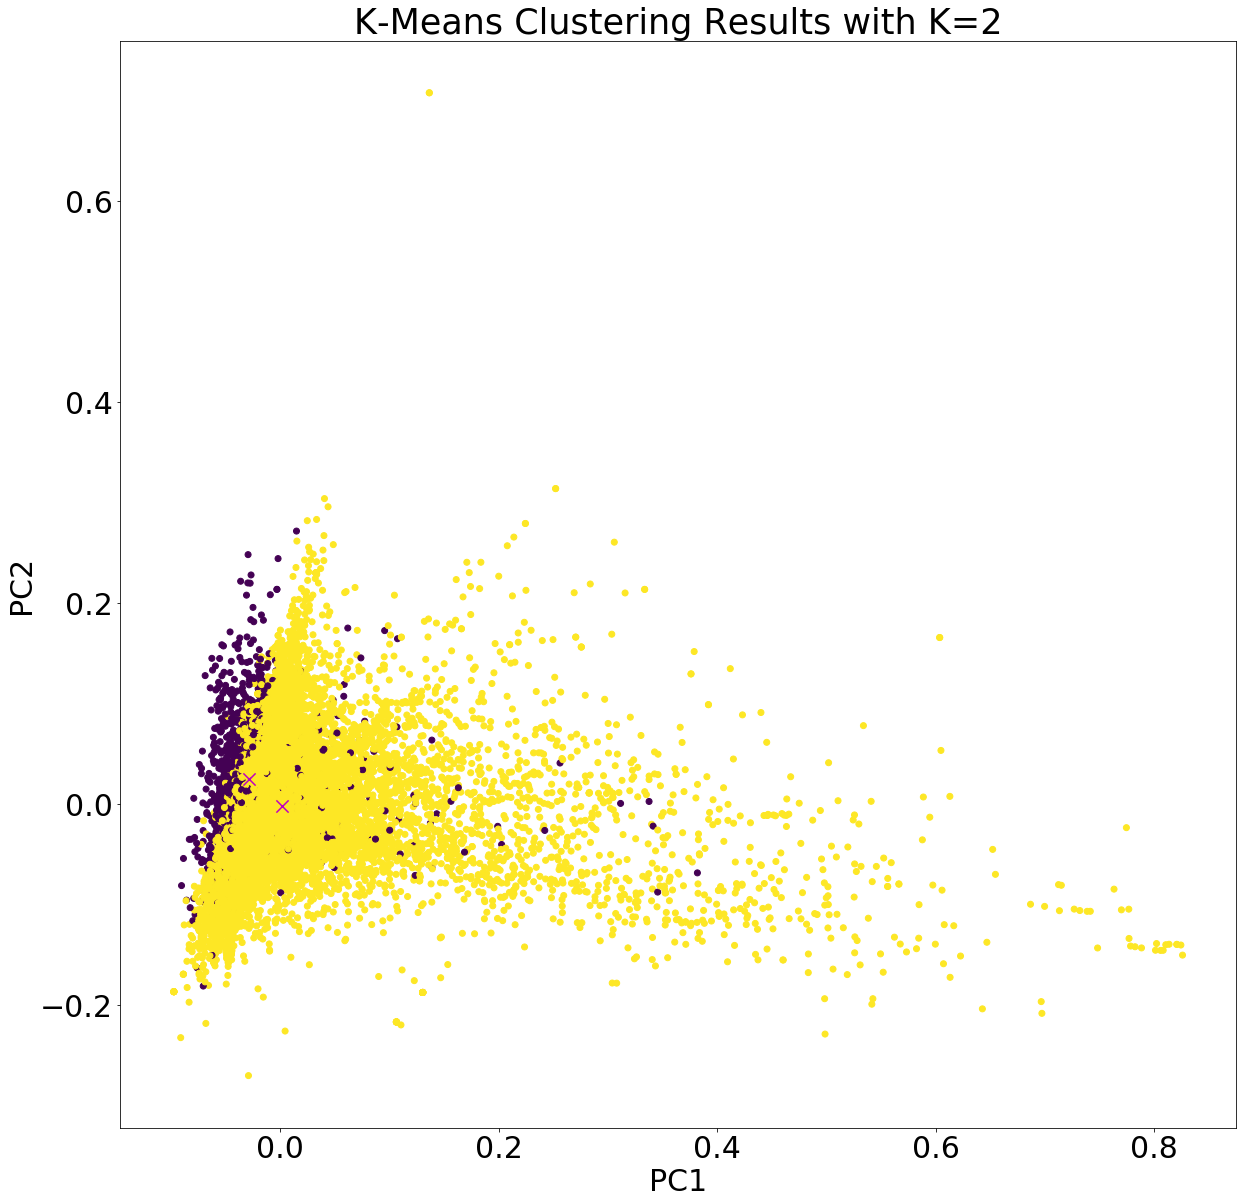

In [9]:
#Create KMeans plot

# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.figure(figsize=(20,20)) 
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='m')

# Add some text for labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering Results with K=2')

In [10]:
#Use the Silhouette Coefficient to check how good the clustering model above is 
silhouette_score(features, labels=cls.predict(features))

0.001761234314342272